## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.filters import roberts, sobel, scharr, prewitt


In [2]:
IMG = 'ISIC_0001769'

## Paths

In [3]:
IMG_PATH = f'fyp2021p3g03/data/example_image/{IMG}.jpg'
SEG_PATH = f'fyp2021p3g03/data/example_segmentation/{IMG}_segmentation.png'

TRUTH = 'fyp2021p3g03/data/example_ground_truth.csv'
FEATURES = 'fyp2021p3g03/features/features.csv'

## Functions

In [4]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


def mask(image, sens):
    '''takes path to .jpg and returns a masked image'''
    img =  image
    #also want to be able to crop the image automaticallty here
    gray = rgb2gray(img) #create grayscale thingy
    img2 = gray < sens # **This level needs manually adjusting, also need to be able to automate**
    
    return img2

## Import single image and create mask

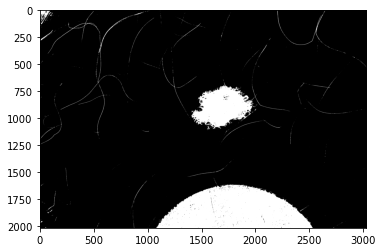

In [7]:
image = plt.imread(IMG_PATH)

image = mask(image,120)

plt.imshow(image, cmap='gray');

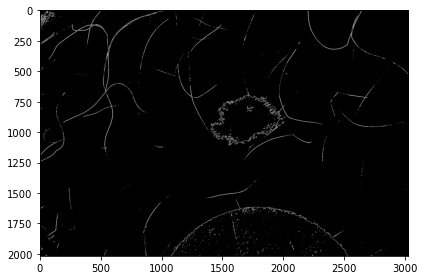

In [26]:
#experiment, not working as intended
edge_sobel = sobel(image)

plt.imshow(edge_sobel, cmap='gray')

plt.tight_layout()
plt.show()

## Load dataframes

In [24]:
truth = pd.read_csv(TRUTH)
truth.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
1,ISIC_0001852,0.0,0.0
2,ISIC_0001871,0.0,0.0
3,ISIC_0003462,0.0,0.0
4,ISIC_0003539,0.0,0.0


In [8]:
cancer = truth[truth['melanoma'] == 1]
cancer.head() #contains all the image id's that are cancerous

,image_id,melanoma,seborrheic_keratosis
25,ISIC_0012099,1.0,0.0
30,ISIC_0012151,1.0,0.0
42,ISIC_0012288,1.0,0.0
51,ISIC_0012434,1.0,0.0
73,ISIC_0013232,1.0,0.0


In [9]:
features = pd.read_csv(FEATURES)
features.head()

,id,area,perimeter
0,ISIC_0001769,216160.0,2013.0
1,ISIC_0001852,130493.0,1372.0
2,ISIC_0001871,205116.0,1720.0
3,ISIC_0003462,161705.0,1344.0
4,ISIC_0003539,317040.0,2063.0


In [10]:
truth[truth['image_id'] == IMG]

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
